<a href="https://colab.research.google.com/github/mseyfi/DeepLearning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Linear Classification (logestic Regression)
# It is not ok to use softmax and sigmoid in case of binary classification interchangably. We can only use softmax if we decide to label the output as a one-hot-encoded vector of size 'batch_num x 2'
# and sigmoid with if the output is 'batch_num x 1' raveled flat vector of zeros and ones. When must feed the cross entrpy loss with probabilities. Therefore the activation function should be tailored for 
# this purpose

import numpy as np
import matplotlib.pyplot as plt
import cv2
%tensorflow_version 2.x
import tensorflow as tf

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 2s 4ms/sample - loss: 1.4753 - accuracy: 0.0892 - val_loss: 1.4785 - val_accuracy: 0.0957
Epoch 2/100
381/381 [==============================] - 0s 197us/sample - loss: 1.3473 - accuracy: 0.1024 - val_loss: 1.3509 - val_accuracy: 0.1064
Epoch 3/100
381/381 [==============================] - 0s 173us/sample - loss: 1.2263 - accuracy: 0.1391 - val_loss: 1.2308 - val_accuracy: 0.1223
Epoch 4/100
381/381 [==============================] - 0s 177us/sample - loss: 1.1160 - accuracy: 0.1444 - val_loss: 1.1188 - val_accuracy: 0.1436
Epoch 5/100
381/381 [==============================] - 0s 179us/sample - loss: 1.0102 - accuracy: 0.1890 - val_loss: 1.0190 - val_accuracy: 0.1968
Epoch 6/100
381/381 [==============================] - 0s 185us/sample - loss: 0.9183 - accuracy: 0.2467 - val_loss: 0.9281 - val_accuracy: 0.2340
Epoch 7/100
381/381 [==============================] - 0s 185us/sample - l

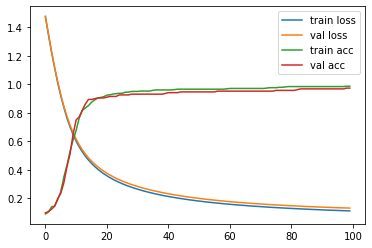

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load the cancer data
data = load_breast_cancer()

# split data to test and train
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)

# choose the number of output neurons
N = 1

# adjust the output activation function based on the number of neurons
activation = ['sigmoid', 'softmax']

# perform One-Hot-Encoding if the output layer has two neurons
if N == 2:
  Y_train = np.array([[p, 1-p] for p in Y_train]).reshape(-1, 2)
  Y_test = np.array([[p, 1-p] for p in Y_test]).reshape(-1,2)

# Normalize the input data
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

# create the model
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(X_train.shape[1],)), tf.keras.layers.Dense(N,activation=activation[N-1])])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100)

# print the training results
print('Train loss {:.2f} acc {:.2f}'.format(model.evaluate(X_train, Y_train)[0], model.evaluate(X_train, Y_train)[1]))
print('Test: loss {:.2f} acc {:.2f}'.format(model.evaluate(X_test, Y_test)[0], model.evaluate(X_test, Y_test)[1]))

plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')


plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
 
